<a href="https://colab.research.google.com/github/Russy-Veemon/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [61]:
me = pd.read_csv('medical_examination.csv')

# create extra column for overweight that calculate BMI, >25 is 1 else is 0
me['overweight'] = me['weight']/((me['height']/100)**2)
me['overweight'] = me['overweight'].apply(lambda x: 1 if x >= 25 else 0)
print(me)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1

**Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.**

In [62]:
# normalize cholesterol and gluc columns to 1-0 scale, >1 is 1 else is 0
me['cholesterol'] = me['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
me['gluc'] = me['gluc'].apply(lambda x: 1 if x > 1 else 0)

print(me)


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

**Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.**

           id  cardio variable  value
0           0       0   active      1
1           1       1   active      1
2           2       1   active      0
3           3       1   active      1
4           4       0   active      0
...       ...     ...      ...    ...
419995  99993       0    smoke      1
419996  99995       1    smoke      0
419997  99996       1    smoke      0
419998  99998       1    smoke      0
419999  99999       0    smoke      0

[420000 rows x 4 columns]


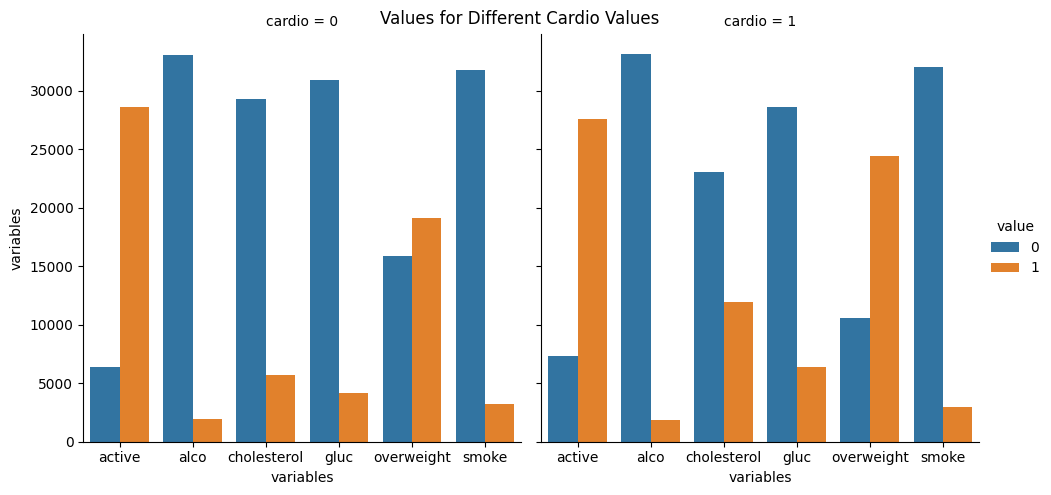

In [63]:
# convert dataset to long format
me_long = pd.melt(me, id_vars=['id', 'cardio'],
                  # items that will stay the same and not become long format
                  # id_vars=['id', 'age', 'sex', 'weight', 'height',  'ap_hi', 'ap_lo', ],
                  value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], 
                  var_name='variable', value_name='value')

# print the first few rows of the long format dataset
print(me_long)
# line of code to see how the id relationship carries over in long format
# me_long_subset = me_long.loc[(me_long['id'] >= 1) & (me_long['id'] <= 3)]
# print(me_long_subset)

# Create catplot with value counts of each categorical feature for the different cardio values
g = sns.catplot(x='variable', col='cardio', hue='value', data=me_long, kind='count')

# Set axis labels and title
g.set_axis_labels('variables', 'variables')
g.fig.suptitle('Values for Different Cardio Values')

# Show the plot
plt.show()


**Clean the data. Filter out the following patient segments that represent incorrect data:**
*   diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
*   height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
*   height is more than the 97.5th percentile
*   weight is less than the 2.5th percentile
*   weight is more than the 97.5th percentile

In [71]:
#clearing entries when diastolic pressure is higher than systolic pressure
filtered_me = me[me['ap_lo'] <= me['ap_hi']]

#clearing height that is less than the 2.5th percentile
filtered_me = me[me['height'] <= me['height'].quantile(0.025)]

#clearing height that is more than the 97.5 percentile
filtered_me = me[me['height'] >= me['height'].quantile(0.975)]

#clearing weight is less than the 2.5th percentile
filtered_me = me[me['weight'] >= me['weight'].quantile(0.025)]

#clearing weight is more than the 97.5th percentile
filtered_me = me[me['weight'] >= me['weight'].quantile(0.975)]

print(filtered_me)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
15        24  16782    2     172   112.0    120     80            0     0   
62        81  20330    2     187   115.0    130     90            0     0   
83       114  19570    1     152   110.0    160     90            0     0   
196      267  22675    1     176   108.0    140     90            0     0   
267      366  17460    1     165   115.0    150    100            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69873  99799  19736    2     188   108.0    130     80            1     1   
69946  99925  21333    1     164   115.0    130     80            0     0   
69947  99930  23305    2     172   113.0    110     80            0     0   
69981  99972  17500    2     182   110.0    130     90            1     1   
69996  99995  22601    1     158   126.0    140     90            1     1   

       smoke  alco  active  cardio  overweight  
15         0     0       0

**Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.**

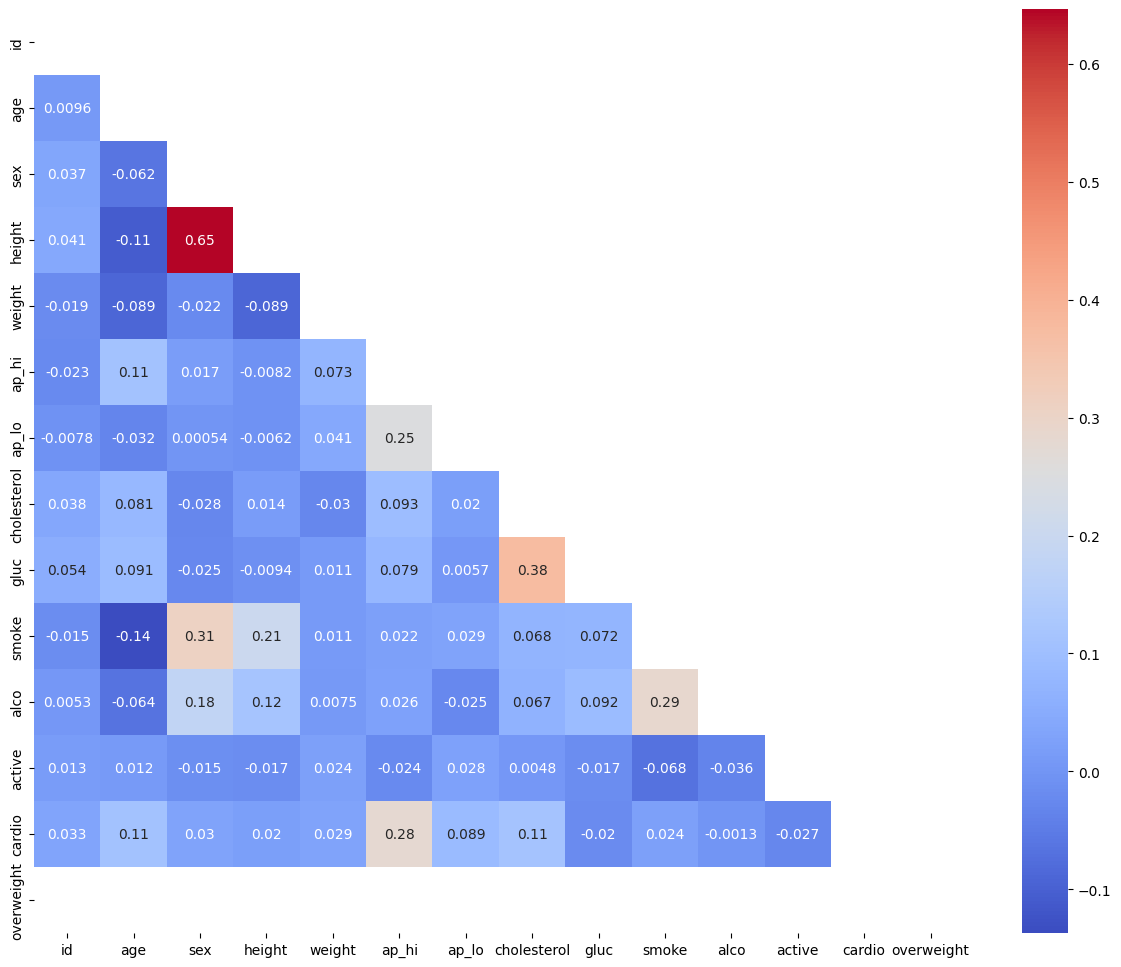

In [83]:
# Calculate the correlation matrix
corr_matrix = filtered_me.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Adjusting figure size for readibility, must go before heatmap is called
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

In [ ]:
# Clean the data first, then create the graph, cholesterol and glucose are on a 3 number grading scale, normalize it to a 0 or 1 scale using python

# # import pandas as pd

# # # me = pd.read_csv('medical_examination.csv')
# # # print(me.columns)

# # # cholesterol, gluc, alco, active, and smoke
# # # Read the CSV file into a pandas dataframe
# # me = pd.read_csv('medical_examination.csv')

# # #calculate the counts for each column
# # counts = me['cholesterol'].value_counts()

# # colors = ['blue', 'orange', 'green']  # set colors for each bar

# # #create a bar chart using matplotlib
# # plt.bar(counts.index, counts.values, color=colors)
# # plt.xticks(counts.index, ['Not overweight', 'Overweight', 'Obesity'])  # set labels for each bar
# # plt.xlabel('Weight Category')
# # plt.ylabel('Number of People')
# # plt.title('Distribution of Weight Categories')
# # plt.show()